In [ ]:
from utils.utils import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils.LSTM import *
import yaml

In [2]:
# with open("config.yaml", 'r') as file:
#             config_data = yaml.safe_load(file)
            
# dfs = dowload_tickers(config_data)

stock = "AMD"

df = pd.read_csv(f"./prices/{stock}_prices.csv", index_col=0, parse_dates=True)

In [3]:
start_day    = "2025-01-01"

horizon_days = 50                           # cantidad de días hábiles a predecir
training_years = 2                         # años previos para entrenar y predecir cada día

feat_cols = ["Close"]

In [4]:
# TRAINING
##########
results = []
for window in [5, 10, 20, 30, 40, 50, 60, 70, 80]:
    res = walk_forward_predict(     LSTMRegressor,
                                    df, 
                                    start_day, 
                                    horizon_days,
                                    training_years=training_years,
                                    feat_cols=feat_cols,

                                    W=window,
                                    
                                    hidden_size=64, 
                                    num_layers=2, 
                                    dropout=0.1,
                                    hit_coef=0.5,
                                    batch_size=5, 
                                    epochs=30, 
                                    lr=0.01,

                                    patience=5,
                                    loss_validation=True,
                                    
                                    torch_seed=0
                                )
    
    res_df = res[0]
    mse = float(np.mean((res_df["y_pred_norm"] - res_df["y_true_norm"])**2))
    print(f"window = {window} | MSE = {mse}")
    results.append({
        "stock": stock,
        "window":window,
        "res":res,
        "mse":mse
    })

Processing test days: 100%|██████████| 50/50 [04:16<00:00,  5.13s/it]


window = 5 | MSE = 0.0006658274665334722


Processing test days: 100%|██████████| 50/50 [04:30<00:00,  5.41s/it]


window = 10 | MSE = 0.0006376728608459924


Processing test days: 100%|██████████| 50/50 [03:41<00:00,  4.44s/it]


window = 20 | MSE = 0.0007957372098968467


Processing test days: 100%|██████████| 50/50 [03:41<00:00,  4.43s/it]


window = 30 | MSE = 0.002177630939483862


Processing test days: 100%|██████████| 50/50 [03:53<00:00,  4.67s/it]


window = 40 | MSE = 0.0026840414946901507


Processing test days: 100%|██████████| 50/50 [03:34<00:00,  4.29s/it]


window = 50 | MSE = 0.0007602716718960362


Processing test days: 100%|██████████| 50/50 [03:13<00:00,  3.87s/it]


window = 60 | MSE = 0.001034359986318212


Processing test days: 100%|██████████| 50/50 [03:06<00:00,  3.73s/it]


window = 70 | MSE = 0.001849393507757744


Processing test days: 100%|██████████| 50/50 [02:57<00:00,  3.55s/it]

window = 80 | MSE = 0.0011255742892945962


best window 10


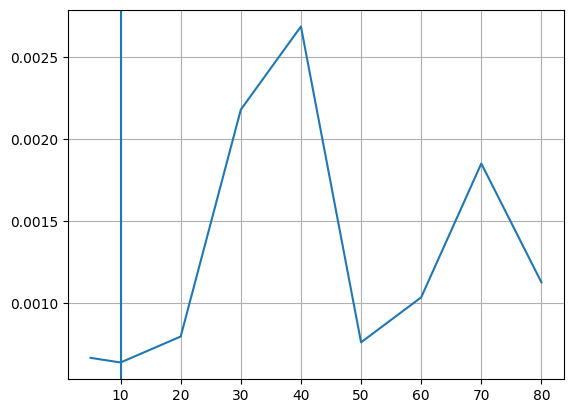

In [5]:
mses = [res["mse"] for res in results]
windows = [res["window"] for res in results]

mse_min = float("inf")
for i in range(len(mses)):
    if mses[i] < mse_min:
        mse_min = mses[i]
        window = windows[i]

print(f"best window {window}")

plt.plot(windows, mses)
plt.axvline(x=window)
plt.grid()